In [1]:
%matplotlib widget

In [2]:
from rayoptics.environment import *

In [3]:
from rayoptics.raytr import sampler, analyses

In [4]:
num_rays = 32

In [5]:
grid_start = np.array([-1., -1.])
grid_stop = np.array([1., 1.])
grid_def = [grid_start, grid_stop, num_rays]

In [6]:
grid_x = []
grid_y = []
grg0 = sampler.create_generator(sampler.grid_ray_generator, grid_def)

for xy in grg0:
    if (xy[0]**2 + xy[1]**2) < 1.0:
        grid_x.append(xy[0])
        grid_y.append(xy[1])

In [7]:
csd_grid_start = np.array([0., 0.])
csd_grid_stop = np.array([1., 1.])
csd_grid_def = csd_grid_start, csd_grid_stop, num_rays
csd_grid_x = []
csd_grid_y = []
grg = sampler.create_generator(sampler.grid_ray_generator, grid_def,
                               mapper=sampler.concentric_sample_disk, offset=False)
for csd in grg:
    csd_grid_x.append(csd[0])
    csd_grid_y.append(csd[1])

In [8]:
r2_grid_x = []
r2_grid_y = []
r2g0 = sampler.create_generator(sampler.R_2_quasi_random_generator, num_rays**2,
                               mapper=lambda xy: 2*xy - np.array([1, 1]))

for xys in r2g0:
    if (xys[0]**2 + xys[1]**2) < 1.0:
        r2_grid_x.append(xys[0])
        r2_grid_y.append(xys[1])

In [9]:
csd_r2_grid_x = []
csd_r2_grid_y = []
r2g = sampler.create_generator(sampler.R_2_quasi_random_generator, num_rays**2,
                               mapper=sampler.concentric_sample_disk)

for csd in r2g:
    csd_r2_grid_x.append(csd[0])
    csd_r2_grid_y.append(csd[1])

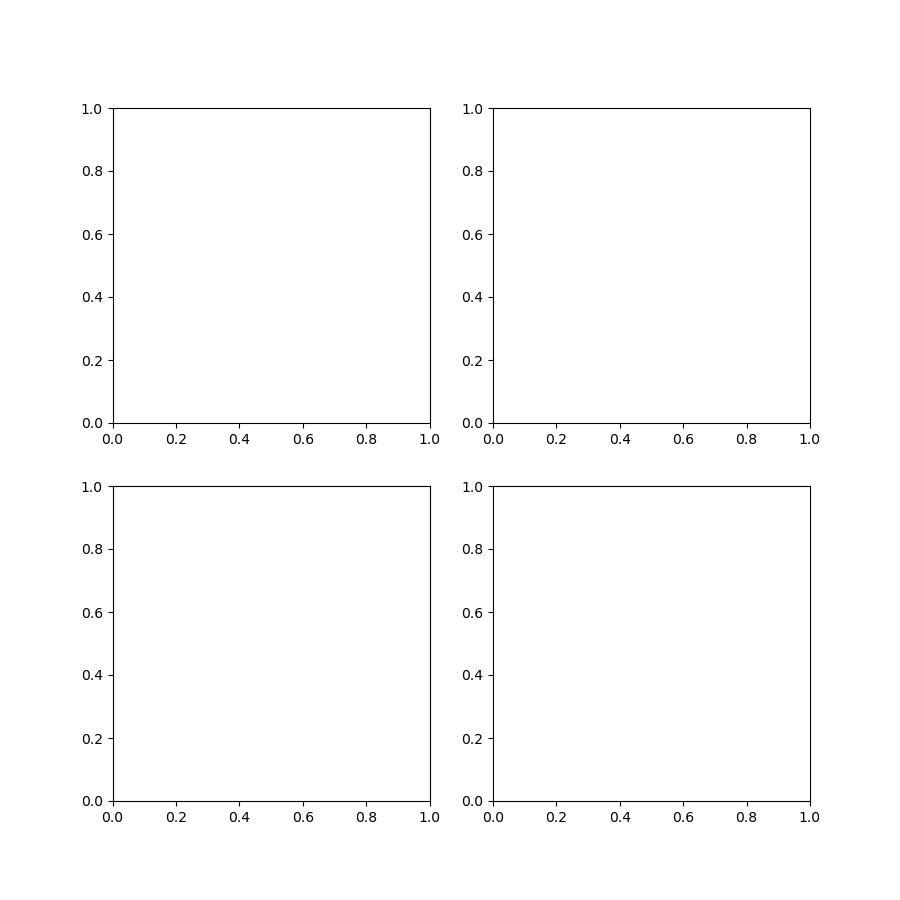

In [10]:
fig, axs = plt.subplots(2, 2, figsize=[9, 9])

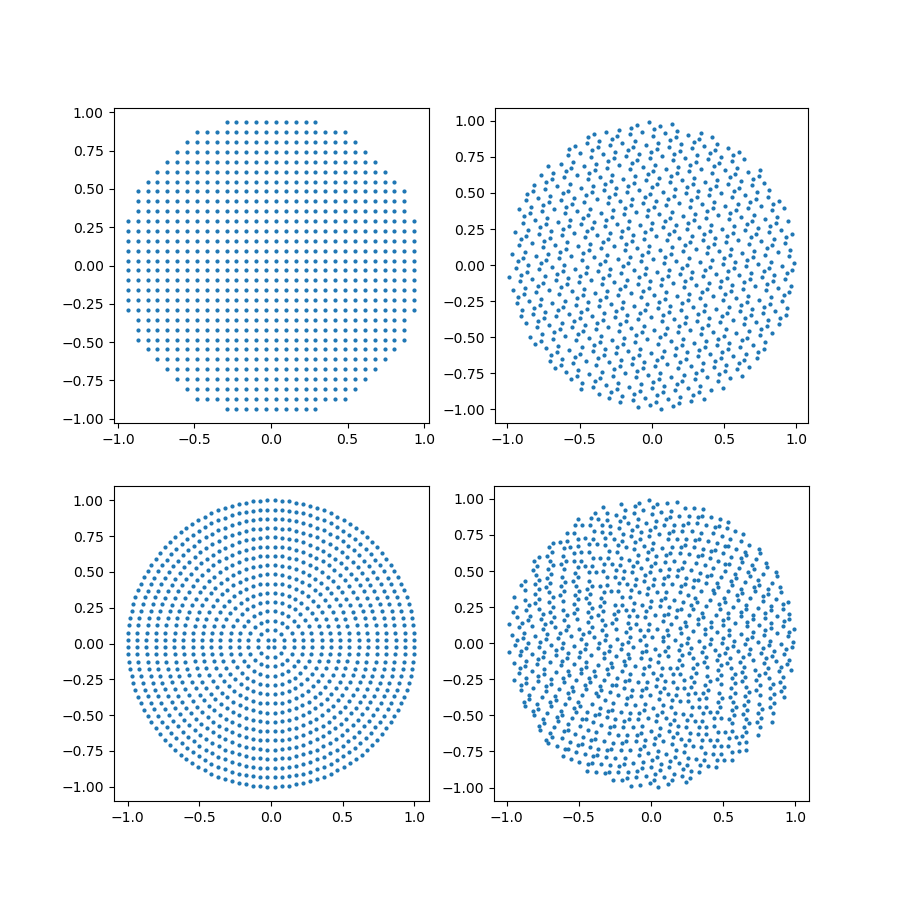

In [11]:
axs[0, 0].scatter(grid_x, grid_y, s=4)
axs[0, 0].set_aspect('equal')
axs[0, 1].scatter(r2_grid_x, r2_grid_y, s=4)
axs[0, 1].set_aspect('equal')
axs[1, 0].scatter(csd_grid_x, csd_grid_y, s=4)
axs[1, 0].set_aspect('equal')
axs[1, 1].scatter(csd_r2_grid_x, csd_r2_grid_y, s=4)
axs[1, 1].set_aspect('equal')
plt.show()

In [12]:
csd_grid_def

(array([0., 0.]), array([1., 1.]), 32)